# Question 1.1

## Import relevant modules and packges

In [75]:
import numpy as np
from scipy.stats import norm


In [2]:
from earthquakeExercise import *

## Question 1.11
* Set up 
* Compute likelihood
* Compute normalized joint posterior
* Compute marginal posterial

In [3]:
# set up and read data

x, y, x_sensor, y_sensor, distance = earthquake_exercise_setup()
vs = read_data('../../data/EarthquakeExerciseData.txt')

    

In [4]:
# MAP to obtain estiamte and unormlized posterior
(s1, s2), posterior = map_optimized(vs, distance, 0.2)
estimate_x, estimate_y = x[[s1, s2]], y[[s1, s2]]

In [5]:
# normalize postrial
posterior_distribution = compute_joint_normalized_posterior(posterior, 0.2)

In [6]:
# compute marginal posterior
h1, h2 = compute_single_normalized_posterior(posterior_distribution)

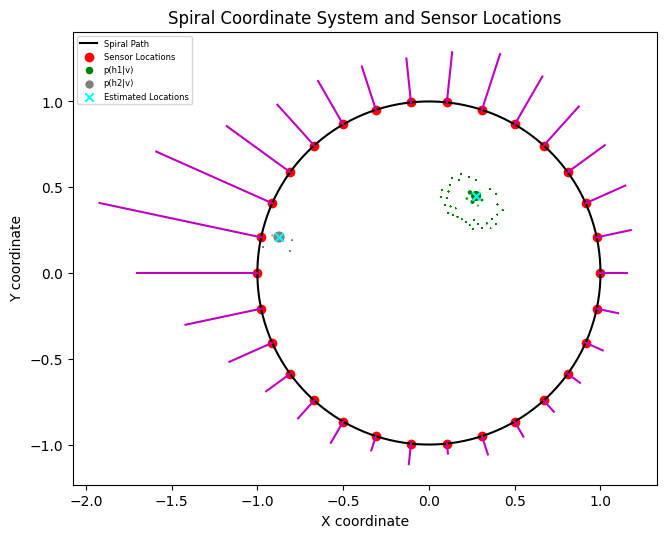

In [7]:
# plot 
visualize(estimate_x, estimate_y, x_sensor, y_sensor, vs, h1, h2, x,y)

## Question 1.2

* $P(v|H_1)$
* $P(v|H_2)$
* $\log{P(v|H_2)} - \log{P(v|H_1)}$

In [170]:
sd = 0.2
np.random.seed(8)
epsilon = np.random.randn(2000, 30)

# epsilon = np.random.randn(30)

In [171]:
# P(v|H_1)
vmean= 1/(distance**2+0.1)
normal_sum = np.sum((vs-(vmean+sd * epsilon))**2, axis = 1) 
likelihoodh1s1 = (1/(np.sqrt(2 * math.pi) * sd))**30*np.exp(-(normal_sum/(2*sd**2)))

likelihoodh1 = np.sum(likelihoodh1s1)


In [172]:
likelihoodh1

9.7997897286e-314

In [173]:
# P(v|H_1)
vmean= 1/(distance**2+0.1) + sd * epsilon

# normal_sum = np.sum((vs-(vmean+sd * epsilon))**2, axis = 1) 
# likelihoodh1s1 = (1/(np.sqrt(2 * math.pi) * sd))**30*np.exp(-(normal_sum/(2*sd**2)))

likelihoodh1s1 = np.ones(2000)

for i in range(30):
    likelihoodh1s1 *= norm.pdf(vmean[:, i],  vs[i], sd)

likelihoodh1 = np.sum(likelihoodh1s1)


In [174]:
likelihoodh1

9.739241175e-314

In [47]:
# p(v|H_2)
likelihoodh2s1s2 = (1/(np.sqrt(2 * math.pi) * sd))**30*np.exp(-(posterior/(2*sd**2)))
likelihoodh2 = np.sum(likelihoodh2s1s2)

In [182]:
# compute 
np.log(likelihoodh2/likelihoodh1)

708.0877313613955

In [183]:
likelihoodh2

3.214545328390973e-06